In [36]:
import sys
# necessary to find ros packages
sys.path.append('/opt/ros/humble/local/lib/python3.10/dist-packages')

import numpy as np
import matplotlib.pyplot as plt
import yaml

from models.point import Point
from models.map import Map
from models.pose import Pose
import math

from path_find_algorithms.A_star.A_star import AStar

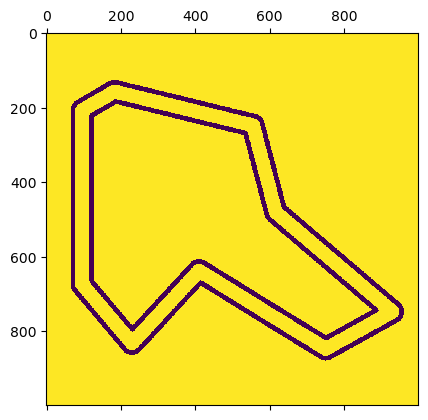

In [37]:
with open('../../../to_be_saved/occupancy_grid.npy', 'rb') as f:
    occupancy_grid = np.load(f)

with (open('../../../to_be_saved/occupancy_grid_info.yaml', 'rb')) as f:
    occupancy_grid_config = yaml.safe_load(f)

occupancy_grid_filtered = (occupancy_grid <2)*1
plt.matshow(occupancy_grid_filtered)

# For some reason the maps come with an resolution offset
resolution = occupancy_grid_config["resolution"]
occupancy_map = Map(occupancy_grid_filtered, resolution, Point(occupancy_grid_config["origin_x"] - resolution, occupancy_grid_config["origin_y"] -resolution))

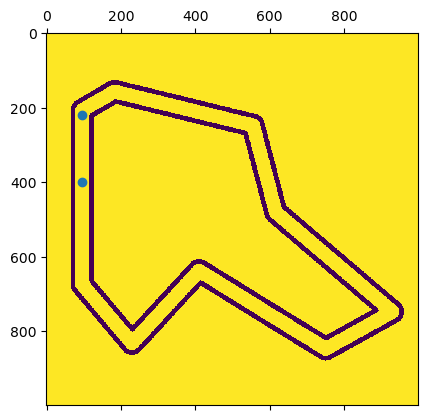

In [38]:
start = Point(94, 250)
goal = Point(94, 400)
plt.matshow(occupancy_grid_filtered)
plt.scatter([start.x, goal.x ], [start.y, goal.y])


backsolve


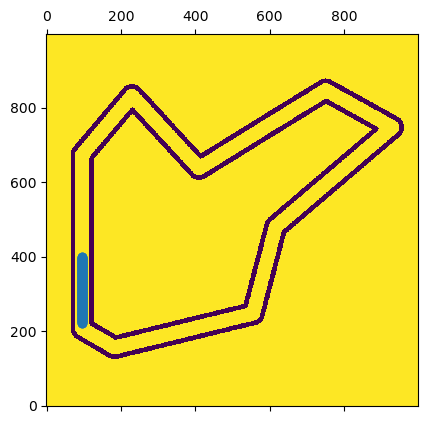

In [39]:

path = AStar.find_path(start, goal, occupancy_map.grid)

plt.matshow(occupancy_grid_filtered)
plt.scatter([point.x for point in path], [point.y for point in path])
plt.gca().invert_yaxis()

In [40]:
# Create Trajectory from Path
path_world_coordinates = list(map(lambda point: occupancy_map.grid_point_to_world_point(
point), path))

trajectory = []
for (curr, next) in zip(path_world_coordinates[:-1], path_world_coordinates[1:]):
    vec_to_target = next - curr
    yaw = math.atan2(vec_to_target.y,  vec_to_target.x)

    trajectory.append(Pose.from_coordinate_and_yaw(coordinate=curr, yaw=yaw))

In [41]:
# Write into file
with open('../../../to_be_saved/trajectory.txt', 'r+') as f:
    for pose in trajectory:
        f.write(f"{pose.coordinate.x},{pose.coordinate.y},{pose.quaternion.x}, {pose.quaternion.y}, {pose.quaternion.z}, {pose.quaternion.w}\n")